In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
olympic_data_path = Path('data_sets/athlete_events.csv')
base_data = pd.read_csv(olympic_data_path)
base_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
basketball_data = base_data[base_data['Sport'] == 'Basketball']


In [4]:
men_basketball = basketball_data[basketball_data['Sex'] == 'M']
women_basketball = basketball_data[basketball_data['Sex'] == 'F']
men_basketball["Medal"].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [5]:
men_basketball['Did_medal?'] = np.where(men_basketball['Medal'].isnull(), "No" , "Yes")
women_basketball['Did_medal?'] = np.where(women_basketball['Medal'].isnull(), "No" , "Yes")
men_basketball.head(20)

/var/folders/n6/ht5nplzd27n_m1xmb_9_4n8m0000gn/T/ipykernel_97363/805021562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_basketball['Did_medal?'] = np.where(men_basketball['Medal'].isnull(), "No" , "Yes")
/var/folders/n6/ht5nplzd27n_m1xmb_9_4n8m0000gn/T/ipykernel_97363/805021562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_basketball['Did_medal?'] = np.where(women_basketball['Medal'].isnull(), "No" , "Yes")


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Did_medal?
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,No
250,124,Youssef Mohamed Abbas,M,31.0,NaN,NaN,Egypt,EGY,1952 Summer,1952,Summer,Helsinki,Basketball,Basketball Men's Basketball,NaN,No
264,136,Alessandro Abbio,M,29.0,195.0,85.0,Italy,ITA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,No
346,192,Ahmed El-Sayed Abdel Hamid Mobarak,M,25.0,189.0,85.0,Egypt,EGY,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,NaN,No
359,199,Amir Abdel Meguid,M,23.0,178.0,67.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,NaN,No
360,199,Amir Abdel Meguid,M,27.0,178.0,67.0,Egypt,EGY,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,NaN,No
363,202,Awad Abdel Nabi Awad,M,19.0,198.0,80.0,Egypt,EGY,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,NaN,No
364,202,Awad Abdel Nabi Awad,M,23.0,198.0,80.0,Egypt,EGY,1976 Summer,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,NaN,No
490,270,Alaa El-Din Abdoun,M,23.0,188.0,78.0,Egypt,EGY,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,NaN,No
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,Yes


In [27]:
# men's data

men_medal= men_basketball[men_basketball['Did_medal?'] == "Yes"]
men_nonmedal = men_basketball[men_basketball['Did_medal?'] == "No"]
del men_nonmedal['Medal']
men_medal = men_medal.dropna(how='any')
men_nonmedal = men_nonmedal.dropna(how='any')

women_medal= women_basketball[women_basketball['Did_medal?'] == "Yes"]
women_nonmedal = women_basketball[women_basketball['Did_medal?'] == "No"]
del women_nonmedal['Medal']
women_medal = women_medal.dropna(how='any')
women_nonmedal = women_nonmedal.dropna(how='any')

# men_nonmedal
# men_medal
# print((men_medal['Height'].mean()))
# print((men_nonmedal['Height'].mean()))
# women_nonmedal.groupby('Year')['Height'].mean()
women_nonmedal_1992  = women_nonmedal[(women_nonmedal['Year'] == 1992)]
# women_nonmedal_1992.groupby('Team').sum()
women_medal_1992  = women_medal[(women_medal['Year'] == 1992)]
women_medal_1992.groupby('Team').sum()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Did_medal?
Team,,,,,,,,,,,,,,,
China,975003,Cong XuediHe JunLi DongmeiLi XinLiu JunLiu Qin...,FFFFFFFFFFF,272.0,2010.0,822.0,CHNCHNCHNCHNCHNCHNCHNCHNCHNCHNCHN,1992 Summer1992 Summer1992 Summer1992 Summer19...,21912,SummerSummerSummerSummerSummerSummerSummerSumm...,BarcelonaBarcelonaBarcelonaBarcelonaBarcelonaB...,BasketballBasketballBasketballBasketballBasket...,Basketball Women's BasketballBasketball Women'...,SilverSilverSilverSilverSilverSilverSilverSilv...,YesYesYesYesYesYesYesYesYesYesYes
Unified Team,708835,Yelena Viktorovna BaranovaElen Rafaelovna Buna...,FFFFFFFFF,225.0,1667.0,678.0,EUNEUNEUNEUNEUNEUNEUNEUNEUN,1992 Summer1992 Summer1992 Summer1992 Summer19...,17928,SummerSummerSummerSummerSummerSummerSummerSumm...,BarcelonaBarcelonaBarcelonaBarcelonaBarcelonaB...,BasketballBasketballBasketballBasketballBasket...,Basketball Women's BasketballBasketball Women'...,GoldGoldGoldGoldGoldGoldGoldGoldGold,YesYesYesYesYesYesYesYesYes
United States,627267,"Victoria Andrea ""Vicky"" BullettDaedra Janel Ch...",FFFFFFFFFFFF,311.0,2182.0,807.0,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSA,1992 Summer1992 Summer1992 Summer1992 Summer19...,23904,SummerSummerSummerSummerSummerSummerSummerSumm...,BarcelonaBarcelonaBarcelonaBarcelonaBarcelonaB...,BasketballBasketballBasketballBasketballBasket...,Basketball Women's BasketballBasketball Women'...,BronzeBronzeBronzeBronzeBronzeBronzeBronzeBron...,YesYesYesYesYesYesYesYesYesYesYesYes


In [7]:
men_medal_means = men_medal.groupby('Year')['Height'].mean().reset_index()
# men_medal_means
men_nonmedal_means = men_nonmedal.groupby('Year')['Height'].mean().reset_index()
# men_nonmedal_means
women_medal_means = women_medal.groupby('Year')['Height'].mean().reset_index()
women_nonmedal_means = women_nonmedal.groupby('Year')['Height'].mean().reset_index()
women_medal_means
# women_nonmedal_means


,Year,Height
0,1976,180.166667
1,1980,180.638889
2,1984,182.371429
3,1988,183.333333
4,1992,183.093750
5,1996,182.166667
6,2000,182.600000
7,2004,184.583333
8,2008,184.888889
9,2012,184.194444


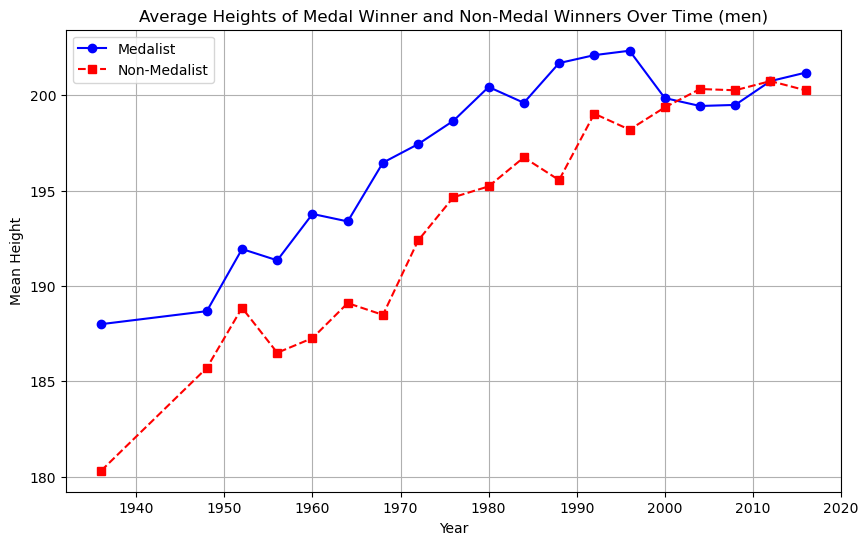

In [25]:

medal_height = men_medal_means["Height"]





plt.figure(figsize=(10,6))

plt.plot(men_medal_means['Year'], 
         men_medal_means['Height'],
        marker='o', 
        linestyle='-', 
        color='b', 
        label='Medalist')
plt.plot(men_nonmedal_means['Year'], 
         men_nonmedal_means['Height'],
        marker='s', 
        linestyle='--', 
        color='r', 
        label='Non-Medalist')

plt.title('Average Heights of Medal Winner and Non-Medal Winners Over Time (men)')
plt.xlabel('Year')
plt.ylabel('Mean Height')
plt.legend()  # Show legend with labels
plt.grid(True)



plt.show();

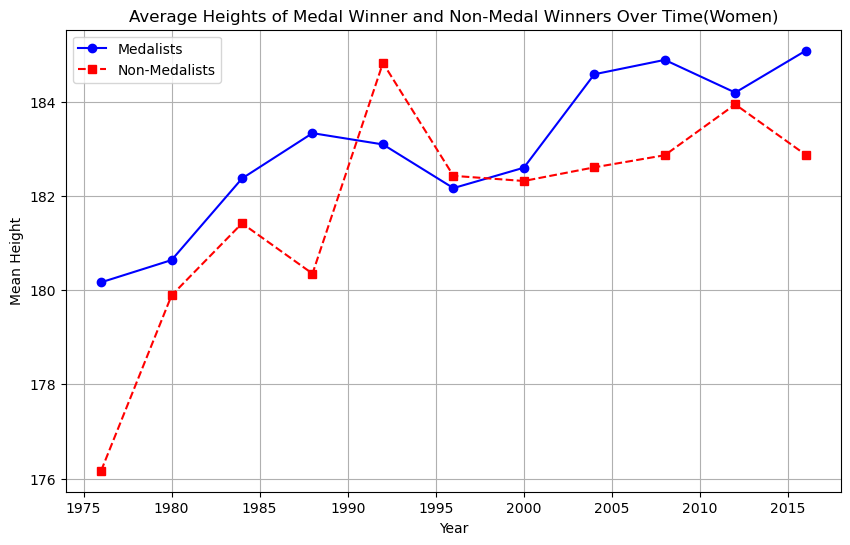

In [26]:
plt.figure(figsize=(10,6))

plt.plot(women_medal_means['Year'], 
         women_medal_means['Height'],
        marker='o', 
        linestyle='-', 
        color='b', 
        label='Medalists')
plt.plot(women_nonmedal_means['Year'], 
         women_nonmedal_means['Height'],
        marker='s', 
        linestyle='--', 
        color='r', 
        label='Non-Medalists')

plt.title('Average Heights of Medal Winner and Non-Medal Winners Over Time(Women)')
plt.xlabel('Year')
plt.ylabel('Mean Height')
plt.legend()  # Show legend with labels
plt.grid(True)

In [47]:
# men_medal_means.plot(kind='bar')
matplotlib.matplotlib_fname()

'/Users/matt/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'

In [18]:
stats.ttest_ind(men_medal.Height, men_nonmedal.Height, equal_var=False)

TtestResult(statistic=7.283799718776104, pvalue=6.211224212140947e-13, df=1089.6987938525997)

In [21]:


print((women_medal['Height'].mean()))
print((women_nonmedal['Height'].mean()))

183.01282051282053
182.2717258261934


In [20]:
stats.ttest_ind(women_medal.Height, women_nonmedal.Height, equal_var=False)

TtestResult(statistic=1.2910745454235144, pvalue=0.19711525992599624, df=682.0243262503308)